#Importing Libraries

In [1]:
import pandas as pd #data processing
import numpy as np #linear algebra
import matplotlib.pyplot as plt #plots

#Loading the dataset

1.Training Dataset

In [2]:
Train = pd.read_csv('/content/train (5).csv')
Train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
Train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


2.Testing Dataset

In [4]:
Test = pd.read_csv('/content/test (1).csv')
Test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
Test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


#Accessing information from the training dataset

In [6]:
#checking for info
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
#checking for the number of rows and columns
Train.shape

(891, 12)

In [8]:
#checking for data types
Train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
#seeing if we have duplicated values
Train.duplicated().sum()

0

In [10]:
#checking if we have missing values
Train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
#Checking for Anomalies/outliers
Q1 = Train.quantile(0.25)
Q3 = Train.quantile(0.75)
IQR = Q3 - Q1

In [12]:
((Train < (Q1 - 1.5 * IQR)) | (Train > (Q3 + 1.5 * IQR))).sum()

Age             11
Cabin            0
Embarked         0
Fare           116
Name             0
Parch          213
PassengerId      0
Pclass           0
Sex              0
SibSp           46
Survived         0
Ticket           0
dtype: int64

* The dataset does not have duplicated values
* The dataset contains missing values
* The dataset has outliers

#Accessing information from the test dataset

In [13]:
#checking for info
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [14]:
#checking for the number of rows and columns
Test.shape

(418, 11)

In [15]:
#data types
Test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [16]:
#Checking if we have duplicated values
Test.duplicated().sum()

0

In [17]:
#checking if we have missing values
Test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [18]:
#Checking for Anomalies/outliers
Q1 = Test.quantile(0.25)
Q3 = Test.quantile(0.75)
IQR = Q3 - Q1

In [19]:
((Test < (Q1 - 1.5 * IQR)) | (Test > (Q3 + 1.5 * IQR))).sum()

Age             2
Cabin           0
Embarked        0
Fare           55
Name            0
Parch          94
PassengerId     0
Pclass          0
Sex             0
SibSp          11
Ticket          0
dtype: int64

#Data Cleaning(Training Dataset)

In [20]:
# filling null values in the age column with the age mean
Train['Age'] = Train['Age'].fillna(value = Train['Age'].mean())

In [21]:
Train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [22]:
#filling null values in the cabin column with mode
Train['Cabin'].fillna(Train['Cabin'].mode()[0], inplace = True)

In [23]:
Train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [24]:
#dropping null values in the embarked column since they are not many
Train.dropna(subset = ['Embarked'], inplace=True)

In [25]:
Train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [26]:
#Correcting Outliers, filtering out the outliers by keeping only valid values
Train = Train[~((Train < (Q1 - 1.5 * IQR)) |(Train > (Q3 + 1.5 * IQR))).any(axis=1)]
Train.shape

(142, 12)

In [ ]:
#Dropping irrelevant columns which contains no usefull information
Train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1, inplace=True)

In [28]:
Train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
687,0,3,male,19.000000,0,0,10.1708,S
688,0,3,male,18.000000,0,0,7.7958,S
690,1,1,male,31.000000,1,0,57.0000,S
692,1,3,male,29.699118,0,0,56.4958,S
693,0,3,male,25.000000,0,0,7.2250,C


#Data Cleaning(Test Dataset)

In [29]:
# filling null values in the age column with the age mean
Test['Age'] = Test['Age'].fillna(value = Test['Age'].mean())

In [30]:
#filling null values in the cabin column with mode
Test['Cabin'].fillna(Test['Cabin'].mode()[0], inplace = True)

In [31]:
Test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin          0
Embarked       0
dtype: int64

In [32]:
#Correcting Outliers, filtering out the outliers by keeping only valid values
Test = Test[~((Test < (Q1 - 1.5 * IQR)) |(Test > (Q3 + 1.5 * IQR))).any(axis=1)]
Test.shape

(292, 11)

In [33]:
Test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,B57 B59 B63 B66,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,B57 B59 B63 B66,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,B57 B59 B63 B66,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,B57 B59 B63 B66,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,B57 B59 B63 B66,S


#EDA(Test Dataset)

In [ ]:
Test.drop(['PassengerId','Name','Cabin','Ticket'], axis = 1, inplace=True)

Encoding Categorical data

In [35]:
#Performing feature engineering on our two categorical columns
Test['Sex'] = Test['Sex'].apply(lambda x:1 if x == 'female' else 0)

In [36]:
Test['Embarked'] = Test['Embarked'].map({'S':1,'Q':2,'C':3})

In [37]:
Test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,2
1,3,1,47.0,1,0,7.0000,1
2,2,0,62.0,0,0,9.6875,2
3,3,0,27.0,0,0,8.6625,1
5,3,0,14.0,0,0,9.2250,1


In [38]:
Test.dtypes

Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int64
dtype: object

#Univariate Analysis(Train Dataset)

In [39]:
#counts of survivors and non survivors
Train['Survived'].value_counts()

0    105
1     37
Name: Survived, dtype: int64

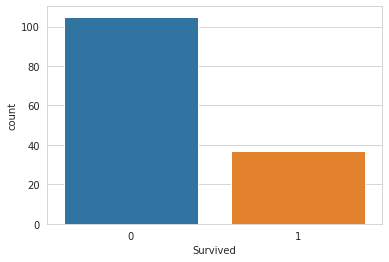

In [40]:
#Visualising count of survivors
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)
import seaborn as sns
sns.set_style('whitegrid')
sns.countplot(Train['Survived'])

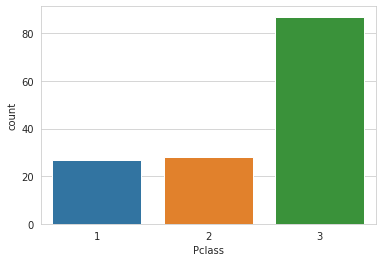

In [41]:
sns.countplot(Train['Pclass'])

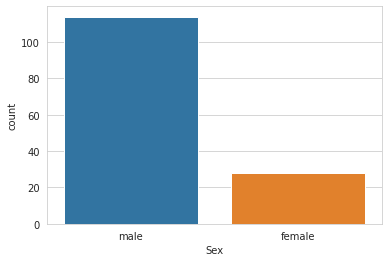

In [42]:
sns.countplot(Train['Sex'])

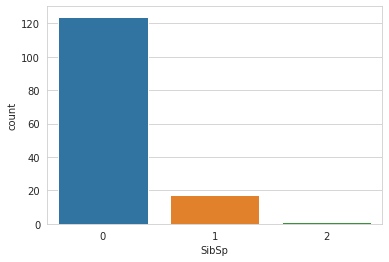

In [43]:
sns.countplot(Train['SibSp'])

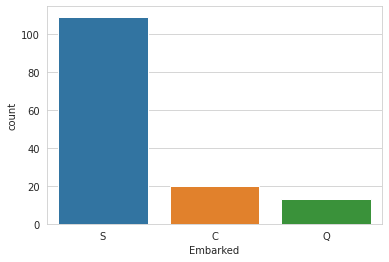

In [44]:
sns.countplot(Train['Embarked'])

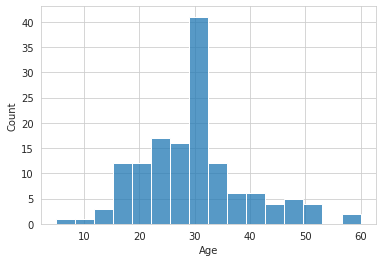

In [45]:
sns.histplot(data = Train, x = 'Age')

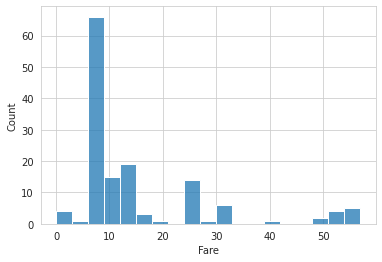

In [46]:
sns.histplot(data = Train, x = 'Fare')

* The number of non survivors is higher compared to those who survived

* There is high number of third class passengers compared to first and second class

* There is more number of males than females

* Sibling Spouse(sibsp) 0 is higher compared to the rest

* Most passengers emberked from Southampton(S) compared to Cherbourg and Queenstown

#Bivariate Analysis(Train Dataset)

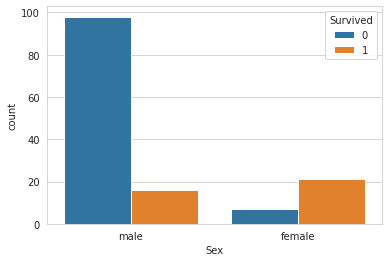

In [47]:
sns.countplot(Train['Sex'], hue = Train['Survived'])

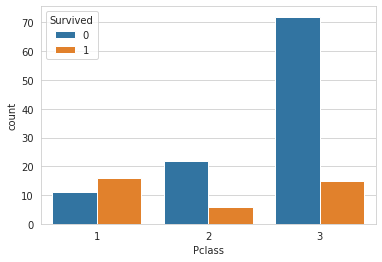

In [48]:
sns.countplot(Train['Pclass'], hue = Train['Survived'])

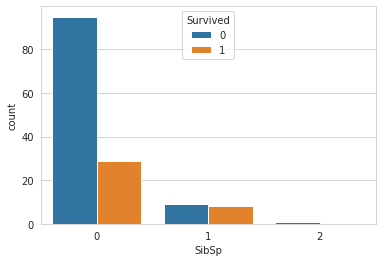

In [49]:
sns.countplot(Train['SibSp'], hue = Train['Survived'])

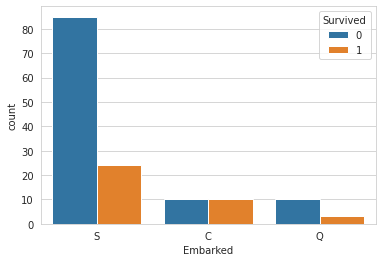

In [50]:
sns.countplot(Train['Embarked'], hue = Train['Survived'])

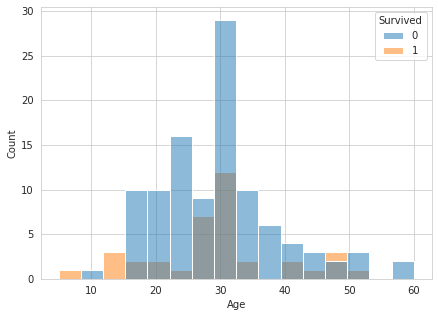

In [51]:
plt.figure(figsize = (7,5))
sns.histplot(data = Train, x = 'Age', hue = 'Survived')

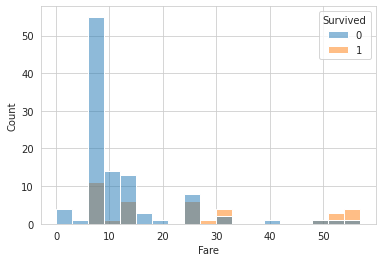

In [52]:
sns.histplot(data = Train, x = 'Fare', hue = 'Survived')

* There is a higher number of male non survivors than females

* There is a higher number of third class passengers who did not survive compared to other classes

* Most passengers who did not survive embarked from southampton

* Most Sibling Spouse(SibSp) 0 did not survive compared to the rest

#Exploratory Data Analysis(Train Dataset)


Encoding Categorical data 

In [53]:
#Performing feature engineering on our two categorical columns
Train['Sex'] = Train['Sex'].apply(lambda x:1 if x == 'female' else 0)

In [54]:
Train['Embarked'] = Train['Embarked'].map({'S':1,'Q':2,'C':3})

In [55]:
Train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
687,0,3,0,19.000000,0,0,10.1708,1
688,0,3,0,18.000000,0,0,7.7958,1
690,1,1,0,31.000000,1,0,57.0000,1
692,1,3,0,29.699118,0,0,56.4958,1
693,0,3,0,25.000000,0,0,7.2250,3


In [56]:
Train.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int64
dtype: object

In [57]:
Train.drop(['Parch'], axis = 1, inplace=True)

In [77]:
Test.shape

(292, 7)

In [78]:
Train.shape

(142, 7)

#Checking for Multicollinearity

In [80]:
#Data pre-processing
X = Train.iloc[:, 1:].values
y = Train.iloc[:, 0].values

In [ ]:
print(X)

In [82]:
print(y)

[0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0
 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1
 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0]


In [83]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

x = add_constant(Train)

pd.Series([variance_inflation_factor(x.values, i)
for i in range(x.shape[1])], index=x.columns)

const       50.694657
Survived     1.846998
Pclass       1.679339
Sex          1.527976
Age          1.143054
SibSp        1.180077
Fare         1.870842
Embarked     1.083501
dtype: float64

* There is multicollinearity between variables in our dataset

#K Nearest Neighbor Classification

In [108]:
#Splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [109]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [115]:
#Training K-NN model on the Training dataset
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 7, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [116]:
y_pred = classifier.predict(X_test)

#Making the Confusion Matrix

In [117]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[27  3]
 [ 5  8]]


0.813953488372093

*With K Nearest Neighbor we've managed to achieve an accuracy of 81% using default parameters



In [118]:
Train.shape

(142, 7)

#Predicting K-NN on the 2nd Dataset(Test Dataset)

In [119]:
Test_subset = Test.sample(n = 142)

In [120]:
Test_subset.replace([np.inf, -np.inf], np.nan, inplace = True)

In [121]:
Test_subset = Test_subset.dropna(axis=0, how = 'any', thresh=None, subset=None, inplace=False)

In [122]:
Test_subset_ = Test_subset.values

In [123]:
np.any(np.isnan(Test_subset))

False

In [124]:
np.all(np.isfinite(Test_subset))

True

In [ ]:
np.ma.masked_array(Test_subset, ~np.isfinite(Test_subset)).filled(0)

In [158]:
X2 = Test_subset[['Pclass','Age','SibSp','Parch','Fare','Embarked']].values
y2 = Test_subset['Sex'].values.reshape(-1, 1)

In [ ]:
print(y2)

In [ ]:
print(X2)

In [166]:
y_pred = classifier.predict(X2)

In [162]:
print(accuracy_score(y2, y_pred))

0.2553191489361702


* we've got a low accuracy of 25% after training our dataset using knn and tested it on a different similar dataset that lacked the target variable